# Assignment 2: Introduction to Data Science and AI - Group 4

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>?</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>?</font> |

**Import Libraries**

In [613]:
from sklearn import metrics
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

**Load datasets**

In [614]:
df = pd.read_csv('data_assignment2.csv')

# check NaN value
df.isnull().sum()

ID                0
Living_area       0
Rooms             2
Land_size         1
Biarea           24
Age               0
Selling_price     0
dtype: int64

In [615]:
df.head()

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


### **Question (1a/1b/1d)**
#### **Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe what you did and explain why.**

#### **What are the values of the slope and intercept of the regression line?**

#### **Draw a residual plot.**

Model slope:     19370.13854733158
Model intercept: 2220603.243355869


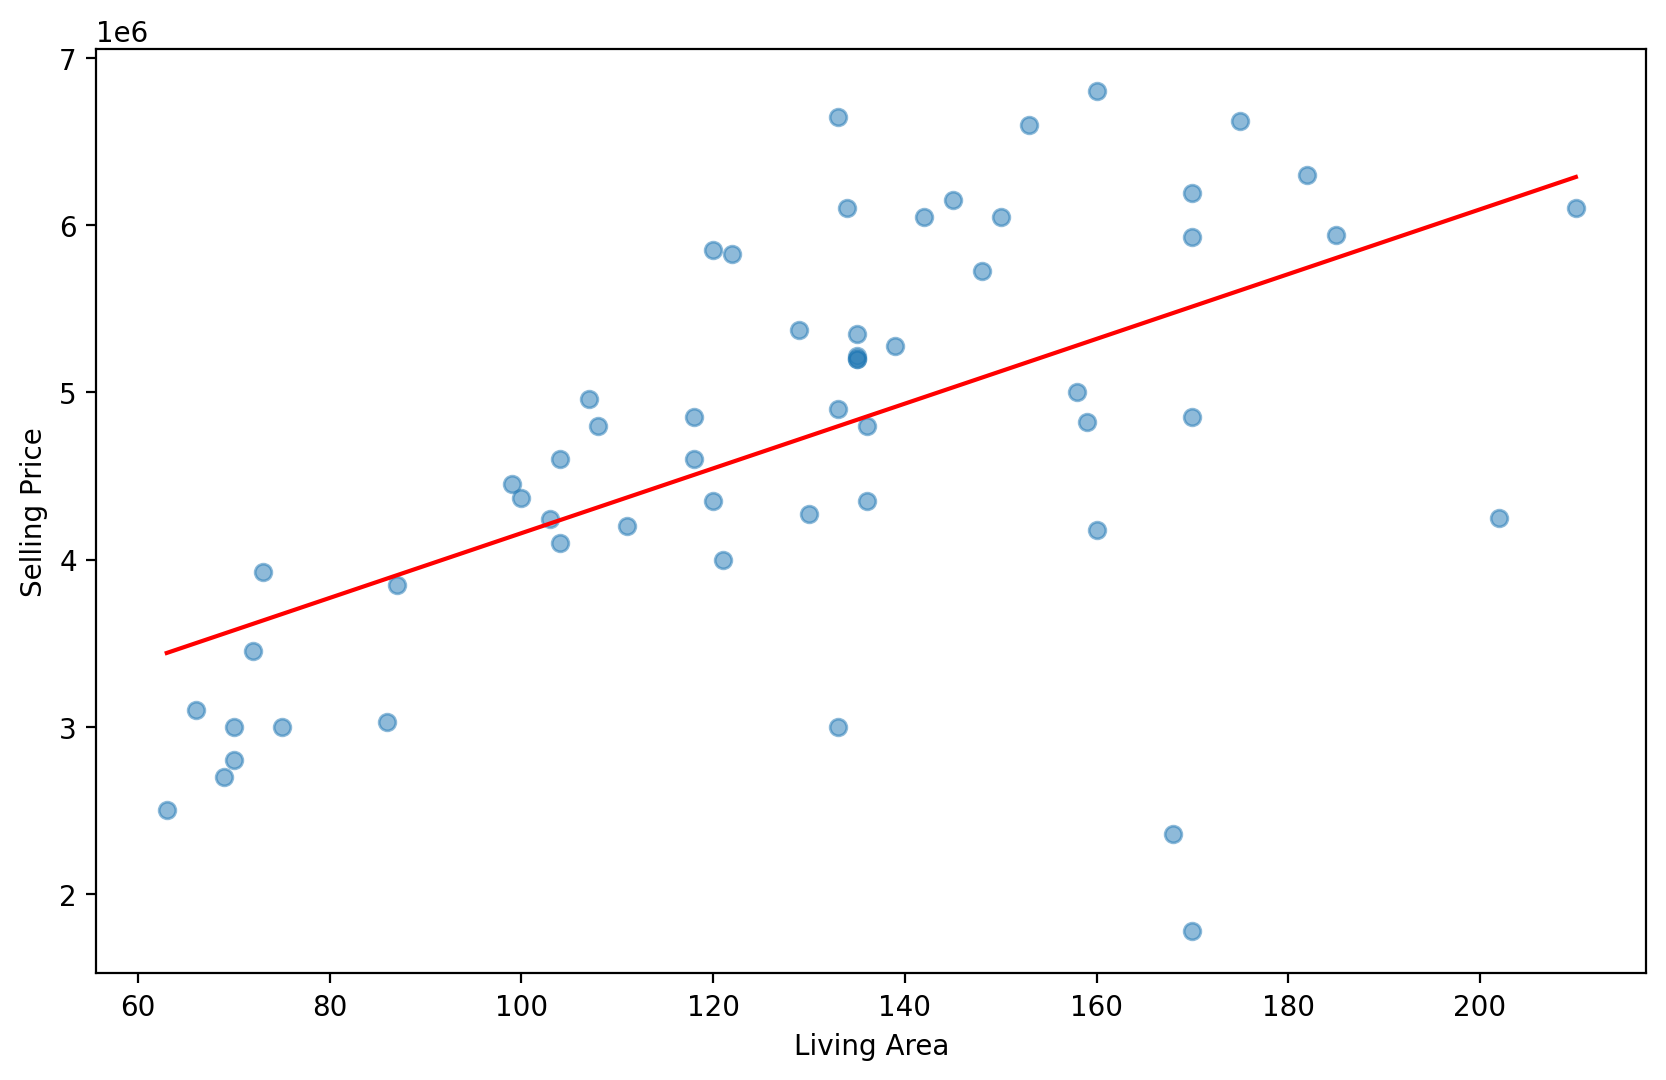

In [616]:
X = df['Living_area']
y = df['Selling_price']

model = LinearRegression(fit_intercept=True)
model.fit(X.values.reshape(-1, 1), y.values.reshape(-1, 1))

X_test = np.linspace(X.min(),X.max(),100)
y_test = model.predict(X_test.reshape(-1, 1)).flatten()

plt.figure(figsize = (10,6))
plt.scatter(X,y,alpha = 0.5)
plt.plot(X_test,y_test,color = 'r')
plt.xlabel('Living Area')
plt.ylabel('Selling Price')

print("Model slope:    ", model.coef_[0][0])
print("Model intercept:", model.intercept_[0])

### **Question (1c)**
#### **Use this model to predict the selling prices of houses which have living area 10 $m^2$, 100 $m^2$, 150 $m^2$, 200 $m^2$, 1000 $m^2$.**

In [617]:
predit = model.predict(np.array([10,100,150,200,1000]).reshape(-1, 1))
print('The selling prices predited for 10   m2 houses is: {:0.2f}'.format(predit[0][0]))
print('The selling prices predited for 100  m2 houses is: {:0.2f}'.format(predit[1][0]))
print('The selling prices predited for 150  m2 houses is: {:0.2f}'.format(predit[2][0]))
print('The selling prices predited for 200  m2 houses is: {:0.2f}'.format(predit[3][0]))
print('The selling prices predited for 1000 m2 houses is: {:0.2f}'.format(predit[4][0]))

The selling prices predited for 10   m2 houses is: 2414304.63
The selling prices predited for 100  m2 houses is: 4157617.10
The selling prices predited for 150  m2 houses is: 5126124.03
The selling prices predited for 200  m2 houses is: 6094630.95
The selling prices predited for 1000 m2 houses is: 21590741.79


### **Question (1e)**

#### **Is this a useful model? Are there any limitations? What could you do to improve the models ability to predict selling prices? Can this model be used in other areas than Landvetter?**

#### **Answer:** 

#### Linear regression model is a useful model that is easy to build and interpret, and it often do pretty well in practice. It is commonly used in many fields, including economics, social sciences, engineering. Since it assumes that there is a linear relationship between the dependent variable and the independent variable(s), so the linear regression model may not accurately capture the relationship between the variables if the relationship is nonlinear, also linear regression is sensitive to outliers.

#### Several ways to improve the models ability to predict selling prices:
    - Add new features or transforming existing features to improve the predictive ability of the model.
    - Clean data, such as missing values, outliers, or incorrect values.
    - Regularization, adds a penalty term to the objective function to keep the most important variables and fit them.
    

### **Question (2a)**

#### **Visualise the Iris data set. Can you gain any insights from the visualisation?**

In [618]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['target'] = pd.Series(iris['target'])
df['species'] = df['target'].replace([0,1,2],[species for species in iris['target_names'].tolist()])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


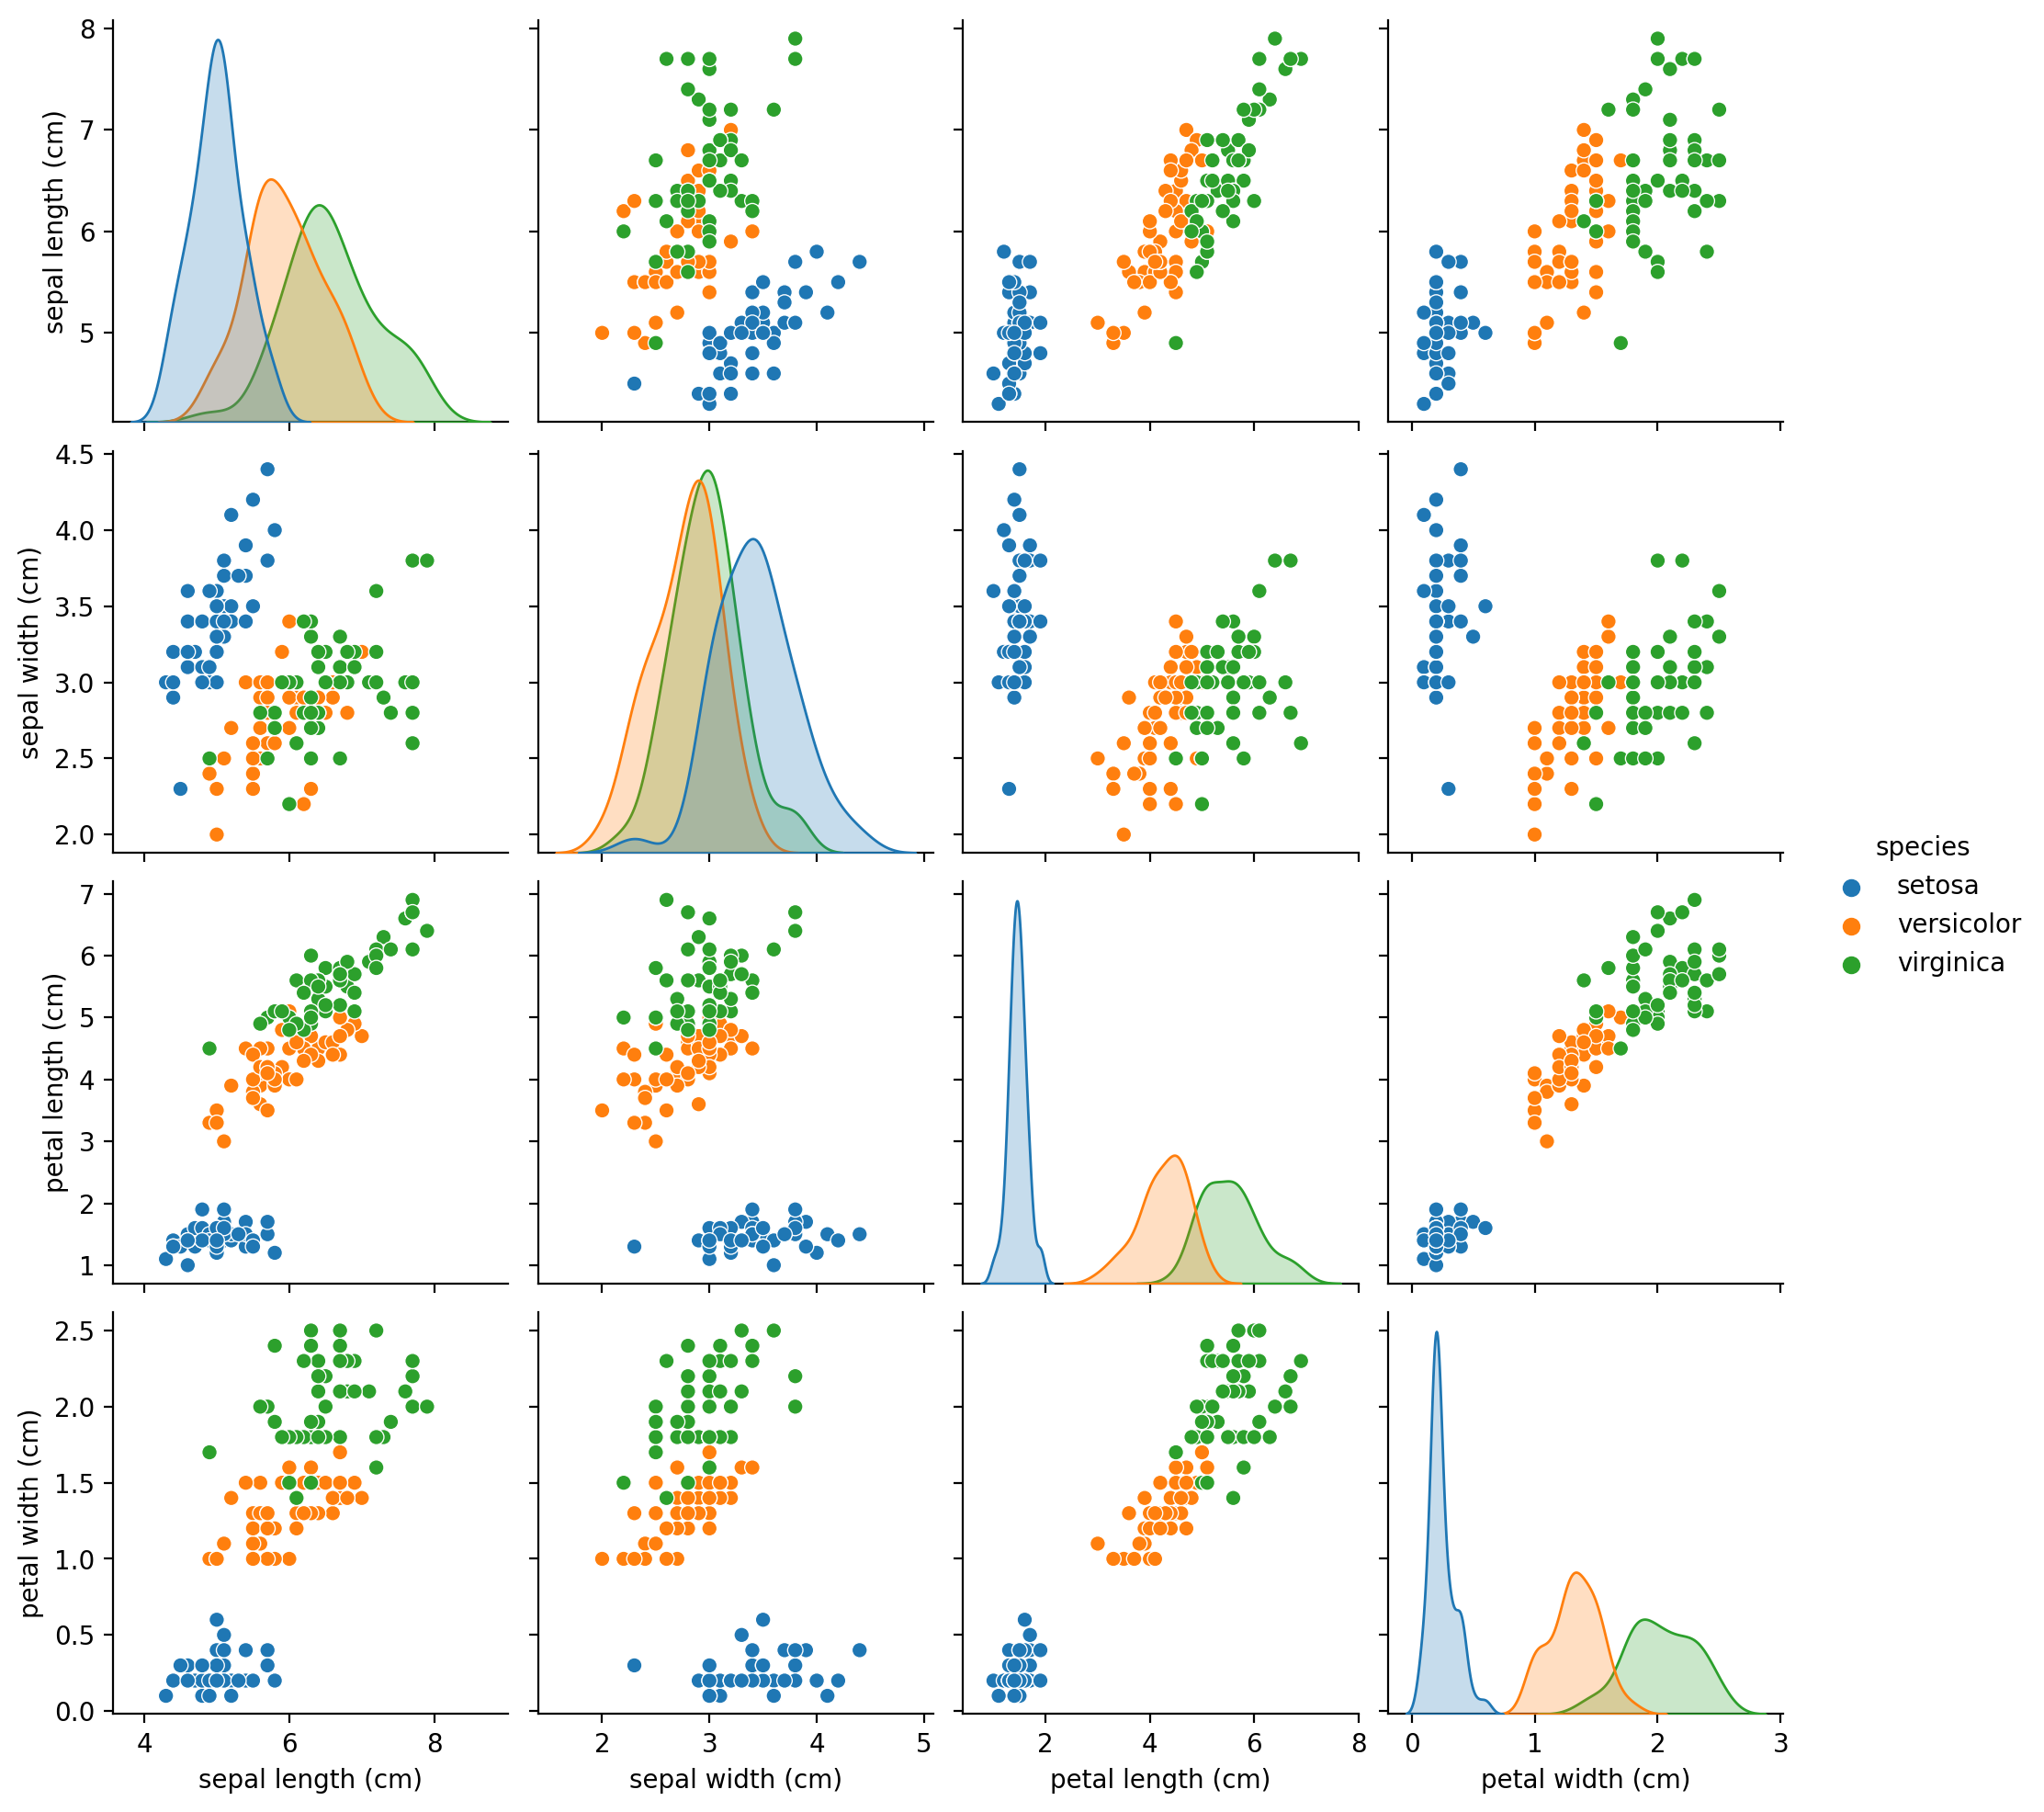

In [619]:
sns.pairplot(df.iloc[:,[0,1,2,3,5]],hue='species')

### **Question (2b)**

#### **Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.**

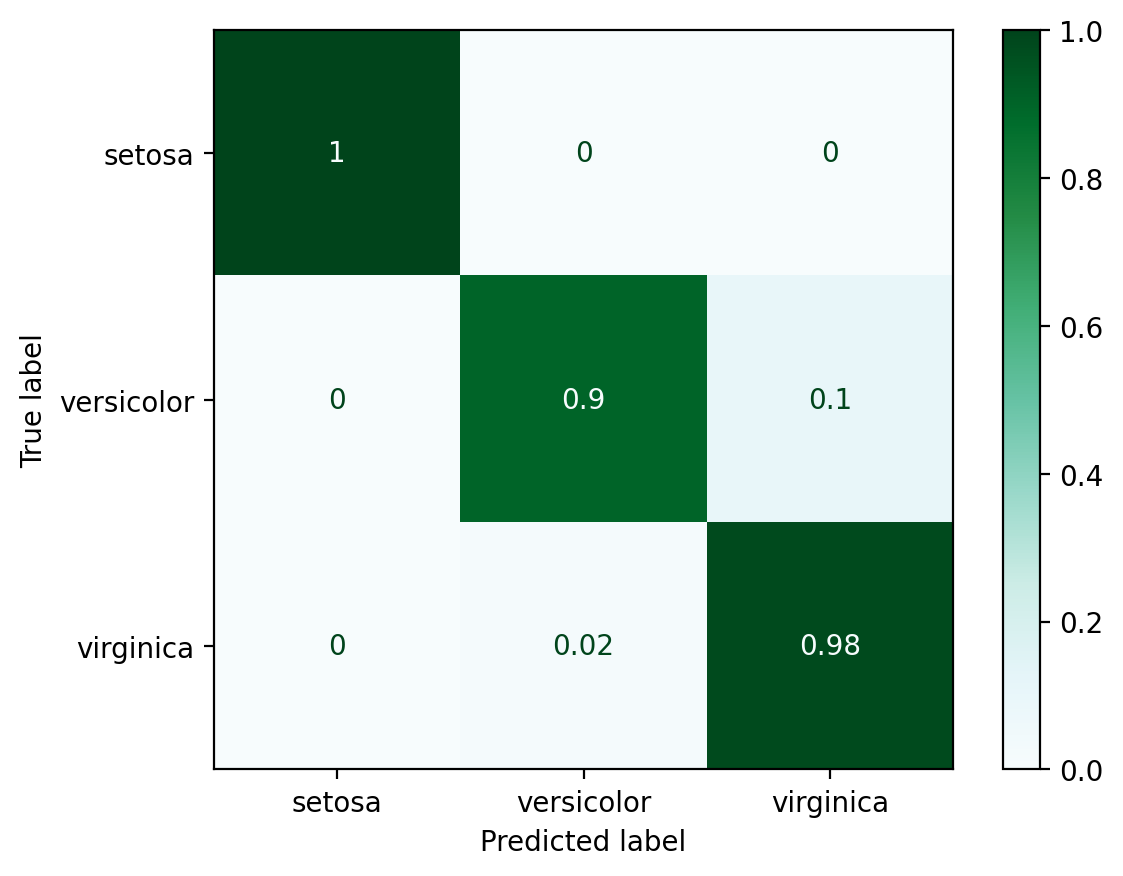

In [620]:
# x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=5)

logisticRegr = LogisticRegression(multi_class='auto', solver='liblinear')
logisticRegr.fit(iris.data, iris.target)

# predictions = logisticRegr.predict(x_test)
metrics.ConfusionMatrixDisplay.from_estimator(logisticRegr, iris.data, iris.target, normalize='true', cmap = 'BuGn', display_labels=iris.target_names)

### **Question (2c)**

#### **Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why does this happen? What do you think is the best choice of k? Compute a confusion matrix for the best uniform and distance-based classifiers.**

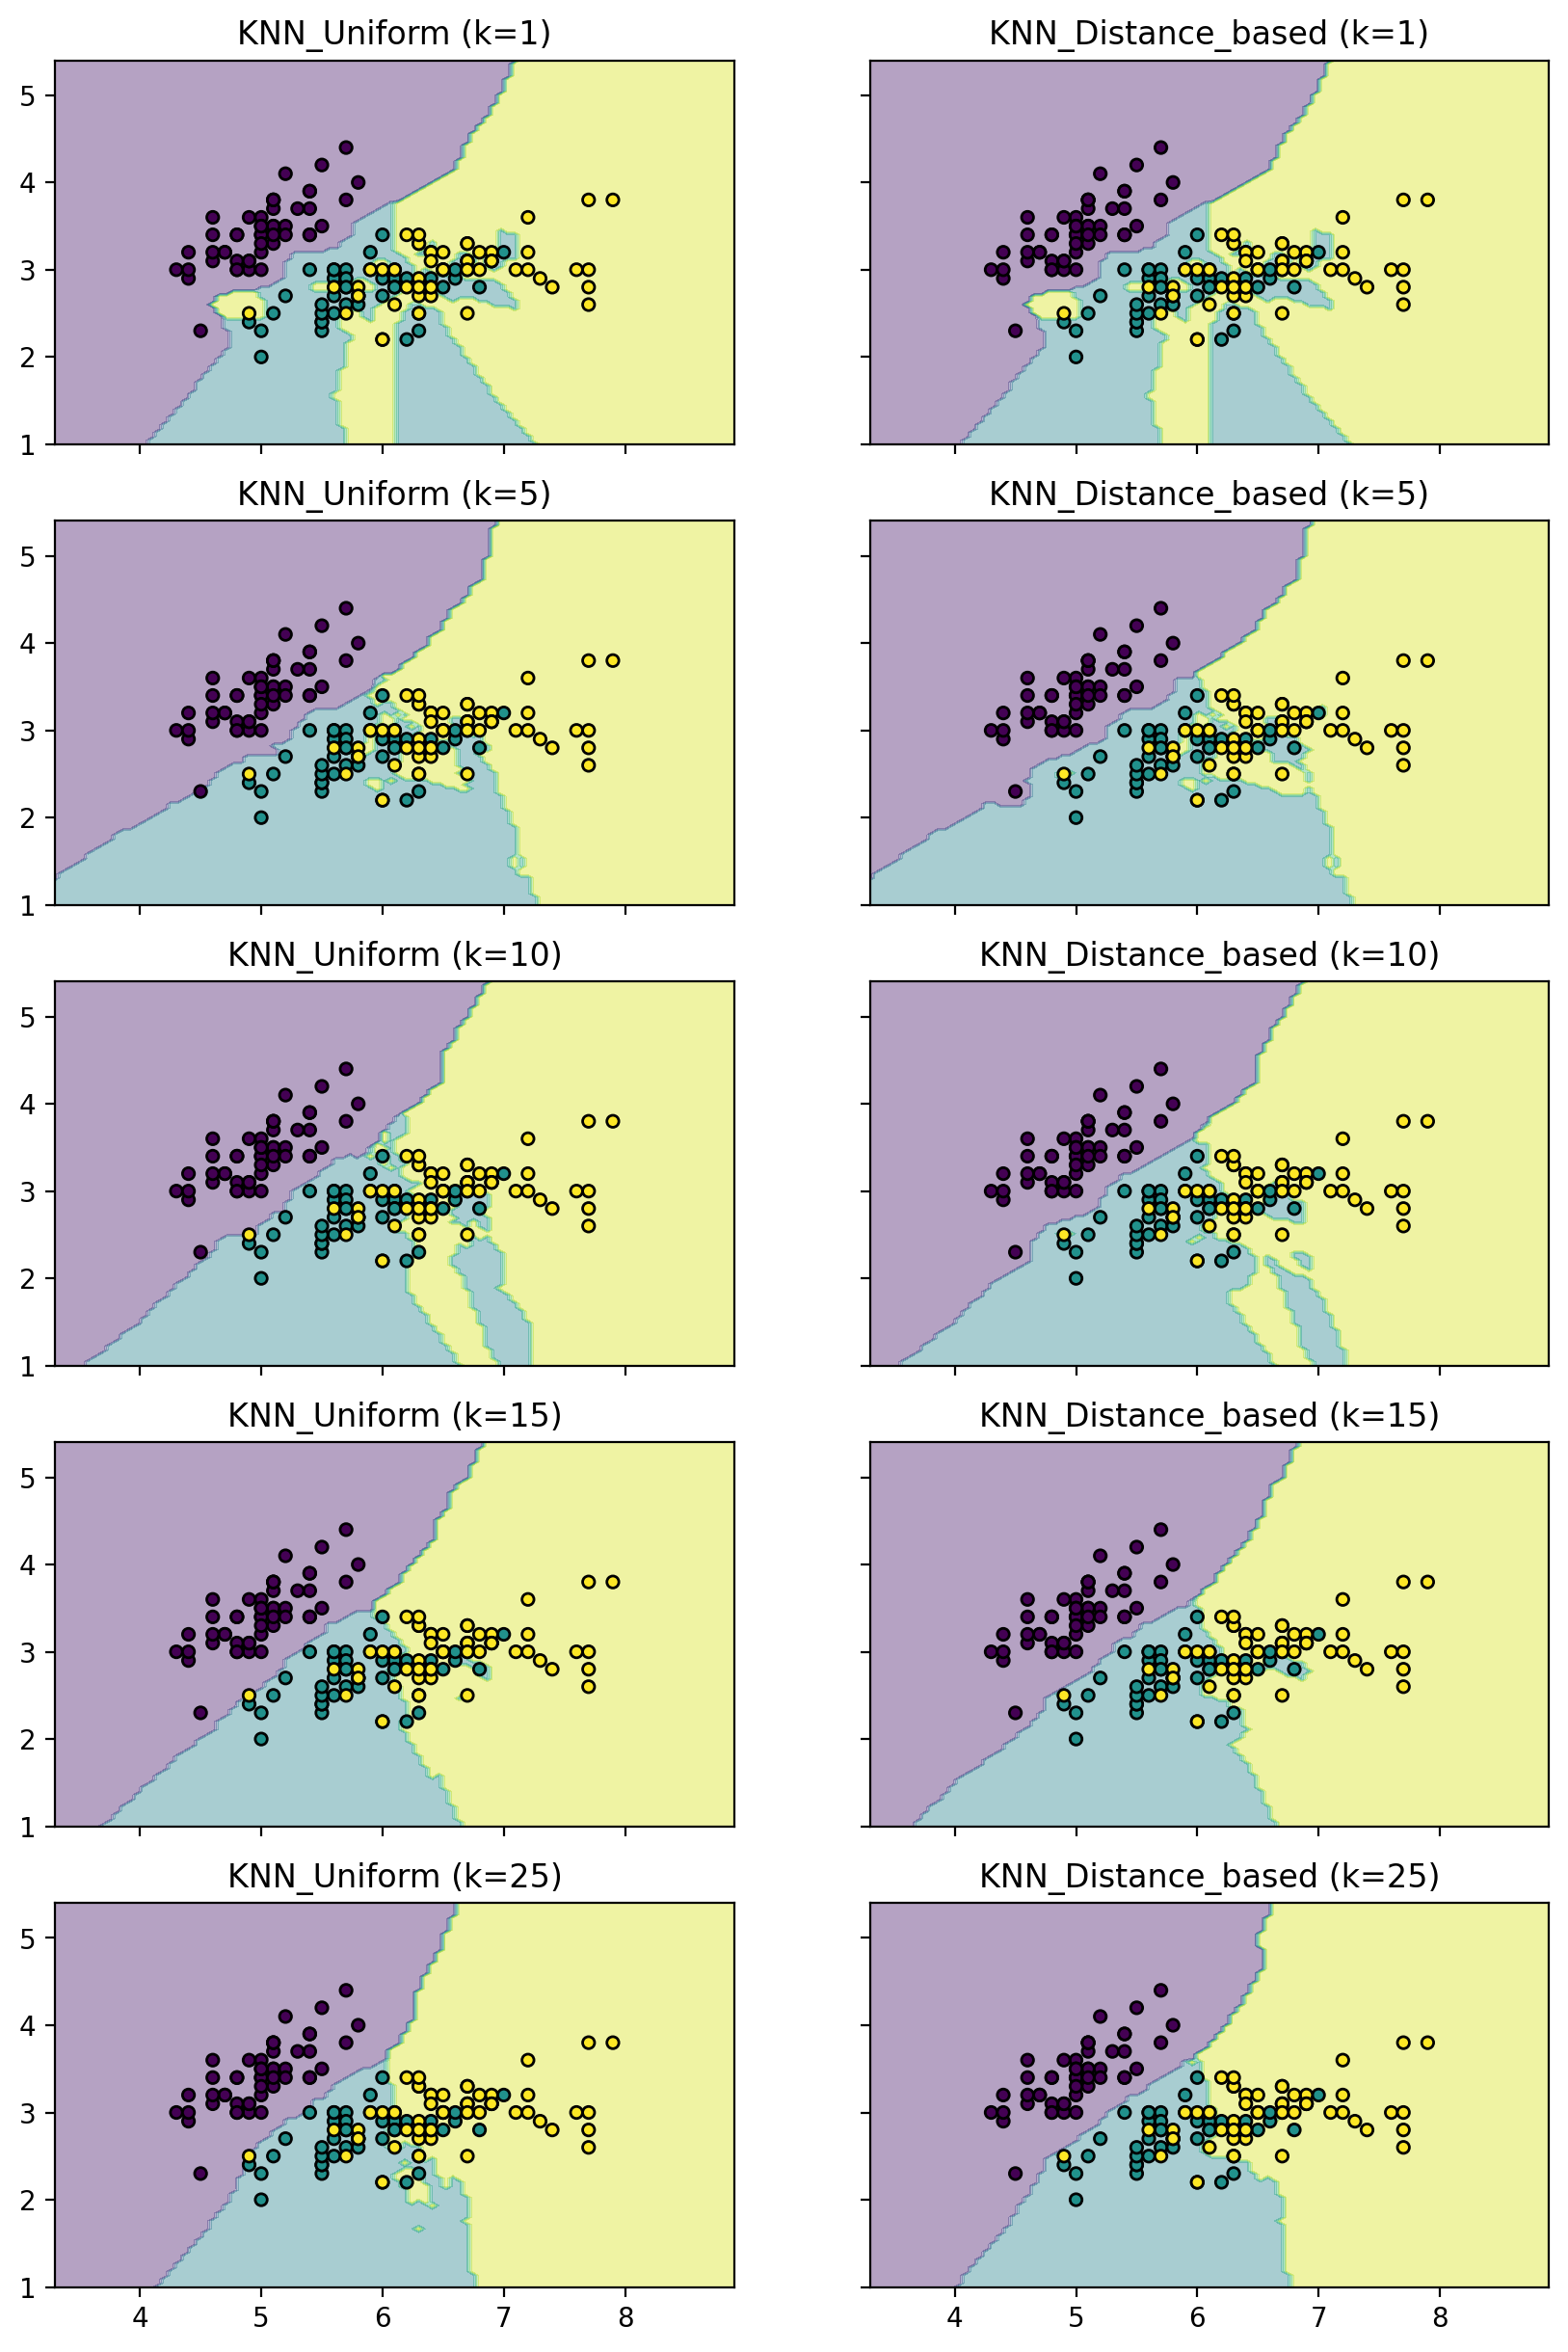

In [621]:
f, axarr = plt.subplots(5, 2, sharex="col", sharey="row", figsize=(10, 15))

index_fig = []
for i in product([0,1,2,3,4], [0, 1]):
    index_fig.append(i)

X = iris.data[:,0:2]
y = iris.target

for k in range(25):
    k = k+1

    model_uniform = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    model_uniform.fit(X, y) 

    model_distance_based = KNeighborsClassifier(n_neighbors = k, weights='distance')
    model_distance_based.fit(X, y) 

    if k in [1,5,10,15,25]:
            index = [1,5,10,15,25].index(k)

            DecisionBoundaryDisplay.from_estimator(model_uniform, X, alpha=0.4, ax=axarr[index_fig[index*2][0],index_fig[index*2][1]], response_method="predict")
            DecisionBoundaryDisplay.from_estimator(model_distance_based, X, alpha=0.4, ax=axarr[index_fig[index*2+1][0],index_fig[index*2+1][1]], response_method="predict")
            
            axarr[index_fig[index*2][0], index_fig[index*2][1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
            axarr[index_fig[index*2][0], index_fig[index*2][1]].set_title("KNN_Uniform (k={})".format(k))
                                                                          
            axarr[index_fig[index*2+1][0], index_fig[index*2+1][1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
            axarr[index_fig[index*2+1][0], index_fig[index*2+1][1]].set_title("KNN_Distance_based (k={})".format(k)) 


[0.96, 0.9466666666666665, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9733333333333334, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666666, 0.9666666666666668, 0.96, 0.9666666666666668, 0.96, 0.96, 0.9466666666666667, 0.96]
[0.96, 0.96, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9733333333333334, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9666666666666668]


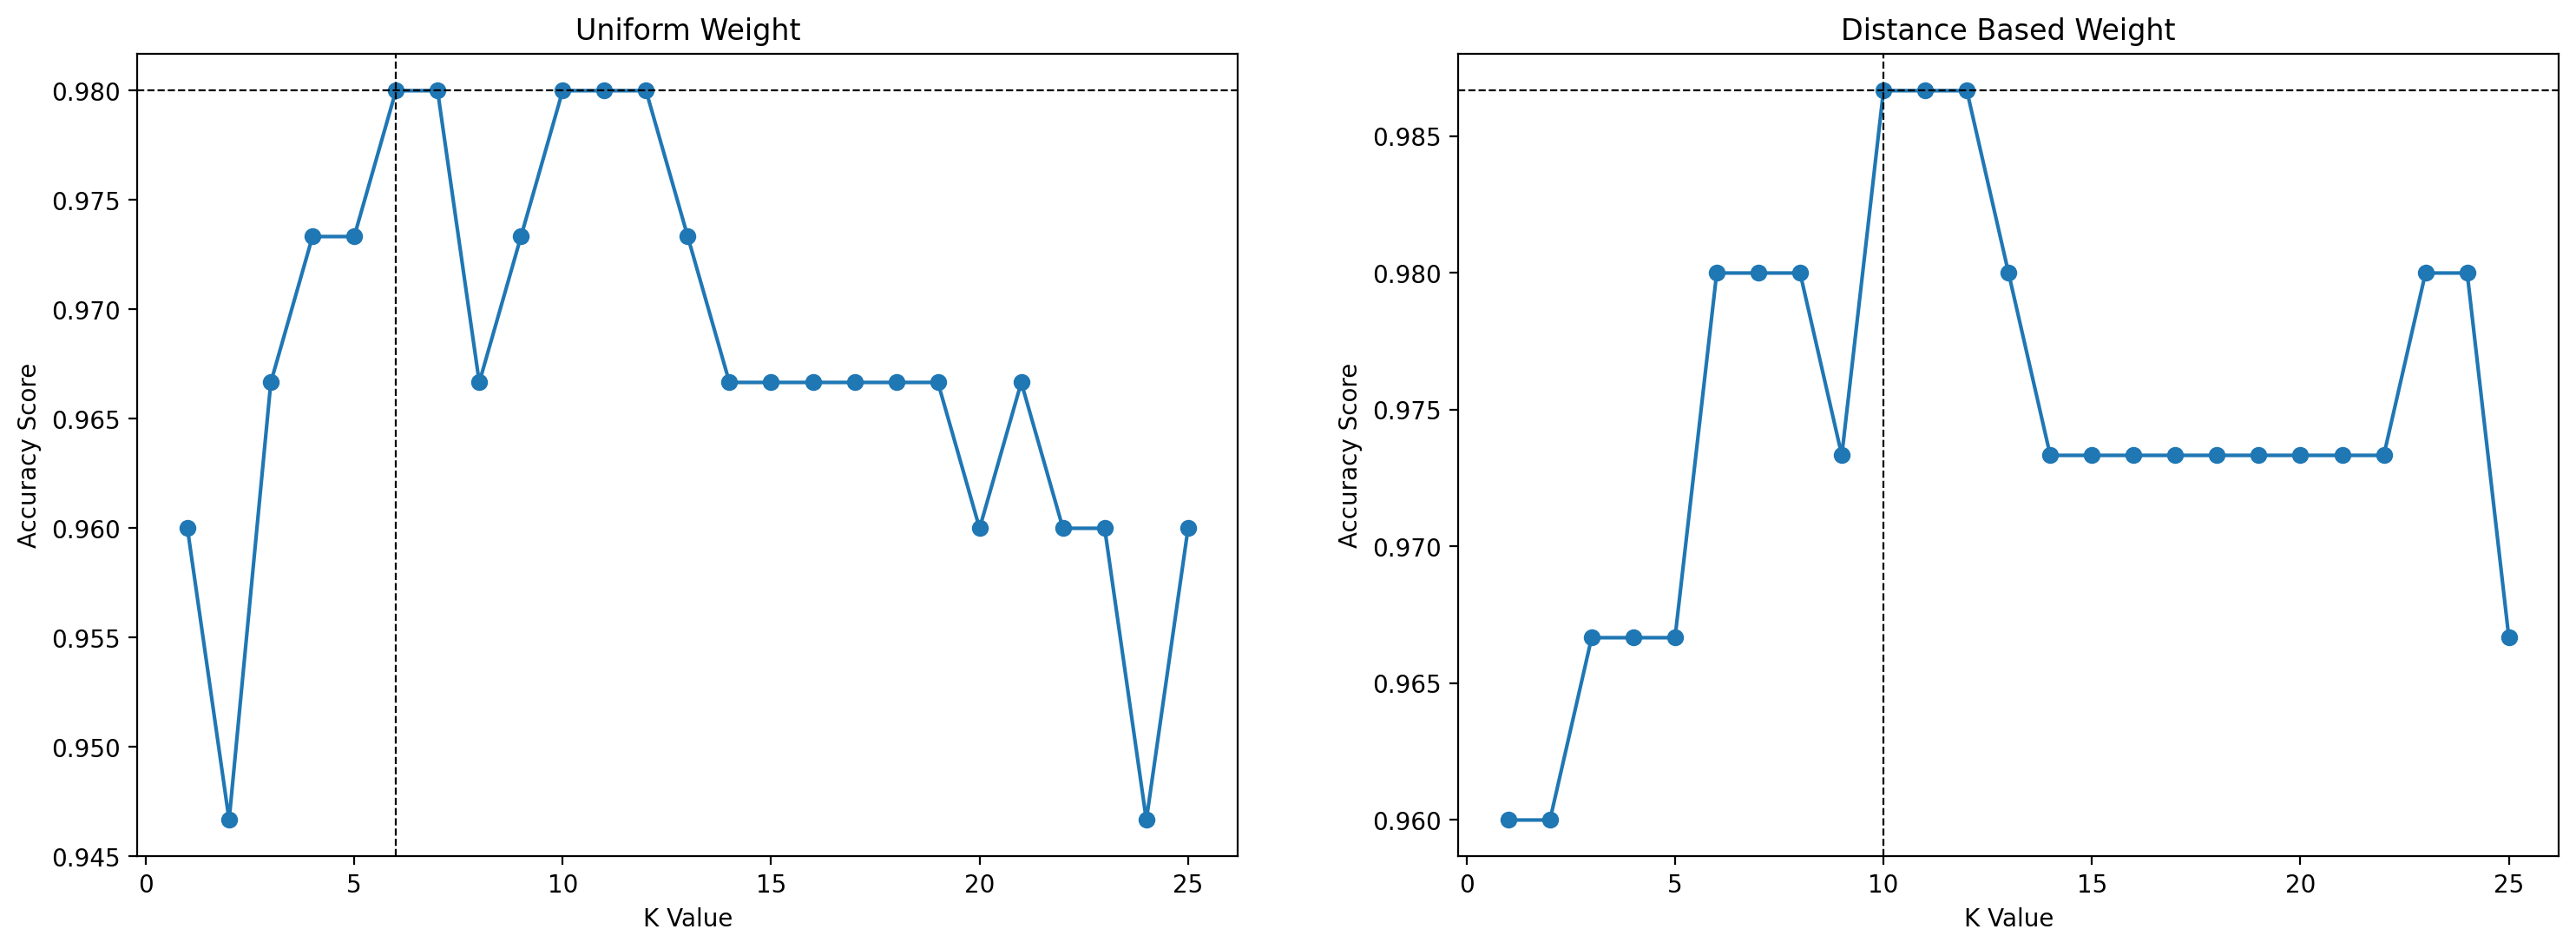

In [622]:
uniform_score = []
distance_based_score = []

X = iris.data
y = iris.target

for k in range(25):
    k = k+1

    model_uniform = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    model_uniform.fit(X, y) 
    scores_uniform = cross_val_score(model_uniform, X, y, cv=5, scoring='accuracy')
    uniform_score.append(scores_uniform.mean())

    model_distance_based = KNeighborsClassifier(n_neighbors = k, weights='distance')
    model_distance_based.fit(X, y) 
    scores_distance = cross_val_score(model_distance_based, X, y, cv=5, scoring='accuracy')
    distance_based_score.append(scores_distance.mean())

fig,(a1,a2) = plt.subplots(1,2,figsize = (18,6))
a1.plot(np.linspace(1,25,25),uniform_score,marker = 'o')
a1.axhline(y = max(uniform_score),linestyle = 'dashed',linewidth = 0.8,color = 'black')
a1.axvline(x = uniform_score.index(max(uniform_score))+1, linestyle = 'dashed',linewidth = 0.8,color = 'black')
a1.set_xlabel('K Value')
a1.set_ylabel('Accuracy Score')
a1.set_title('Uniform Weight')

a2.plot(np.linspace(1,25,25),distance_based_score,marker = 'o')
a2.axhline(y = max(distance_based_score),linestyle = 'dashed',linewidth = 0.8,color = 'black')
a2.axvline(x = distance_based_score.index(max(distance_based_score))+1, linestyle = 'dashed',linewidth = 0.8,color = 'black')
a2.set_xlabel('K Value')
a2.set_ylabel('Accuracy Score')
a2.set_title('Distance Based Weight')



print(uniform_score)
print(distance_based_score)

For Uniform

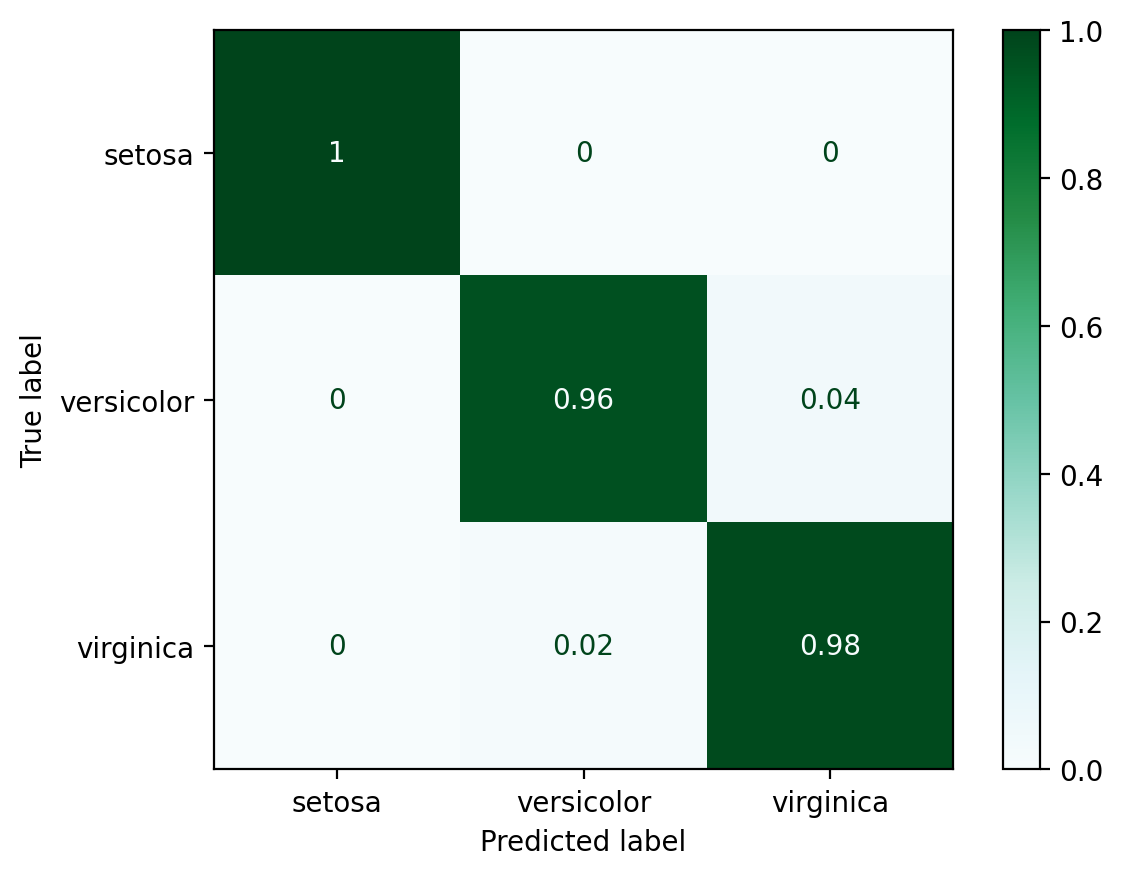

In [623]:
metrics.ConfusionMatrixDisplay.from_estimator(model_uniform,X, y, normalize='true', cmap = 'BuGn', display_labels=iris.target_names)

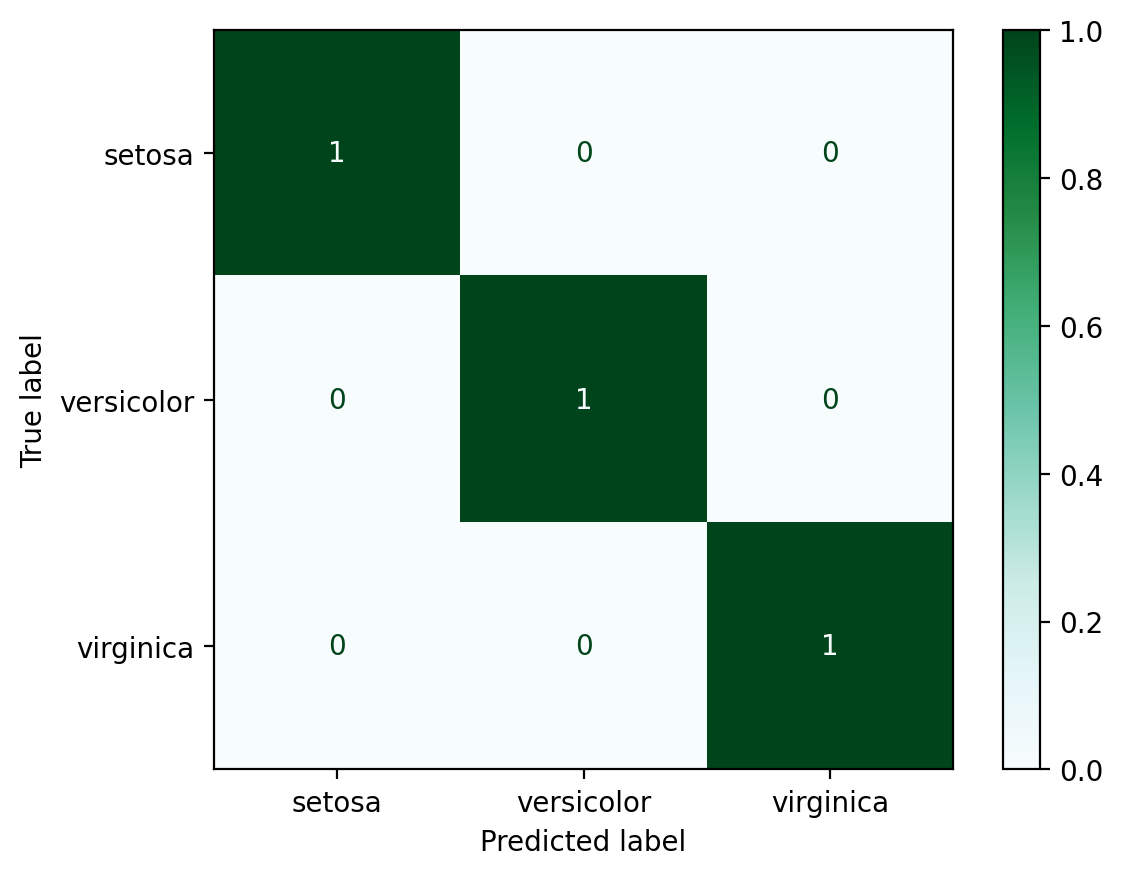

In [624]:
metrics.ConfusionMatrixDisplay.from_estimator(model_distance_based,X, y, normalize='true', cmap = 'BuGn', display_labels=iris.target_names)

### **Question (2d)**

#### **Compare the logistic regression classifier in (a) with the k-nearest neighbour classifiers in (b). What do you observe? Are all classes equally challenging for the models to predict?**